In [28]:
import full_model
import fast_model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from joblib import Parallel, delayed

In [29]:
def generate_and_find_inf(num_nodes, steps, num_influencers=0):

    G = nx.barabasi_albert_graph(num_nodes, 2)

    model_inf = fast_model.InfluenceDeinfluenceModel(G)
    model_inf.set_initial_states()
    initial_influencers = model_inf.greedy_hill_climbing(num_influencers, steps)

    #initial_influencers = model_inf.greedy_hill_climbing_new(num_influencers)
    print("Optimized Initial Influencers:", initial_influencers)

    return model_inf, initial_influencers

In [36]:
# Example usage
num_nodes = 500
inf_steps = 10
num_influencers = 5

results = generate_and_find_inf(num_nodes, steps, num_influencers=num_influencers)

(model_inf, optimized_influencers) = results

#print("count influence", model.evaluate_influence())

Optimized Initial Influencers: {0, 420, 150, 411, 479}


Optimized Influencers: {0, 420, 150, 411, 479}


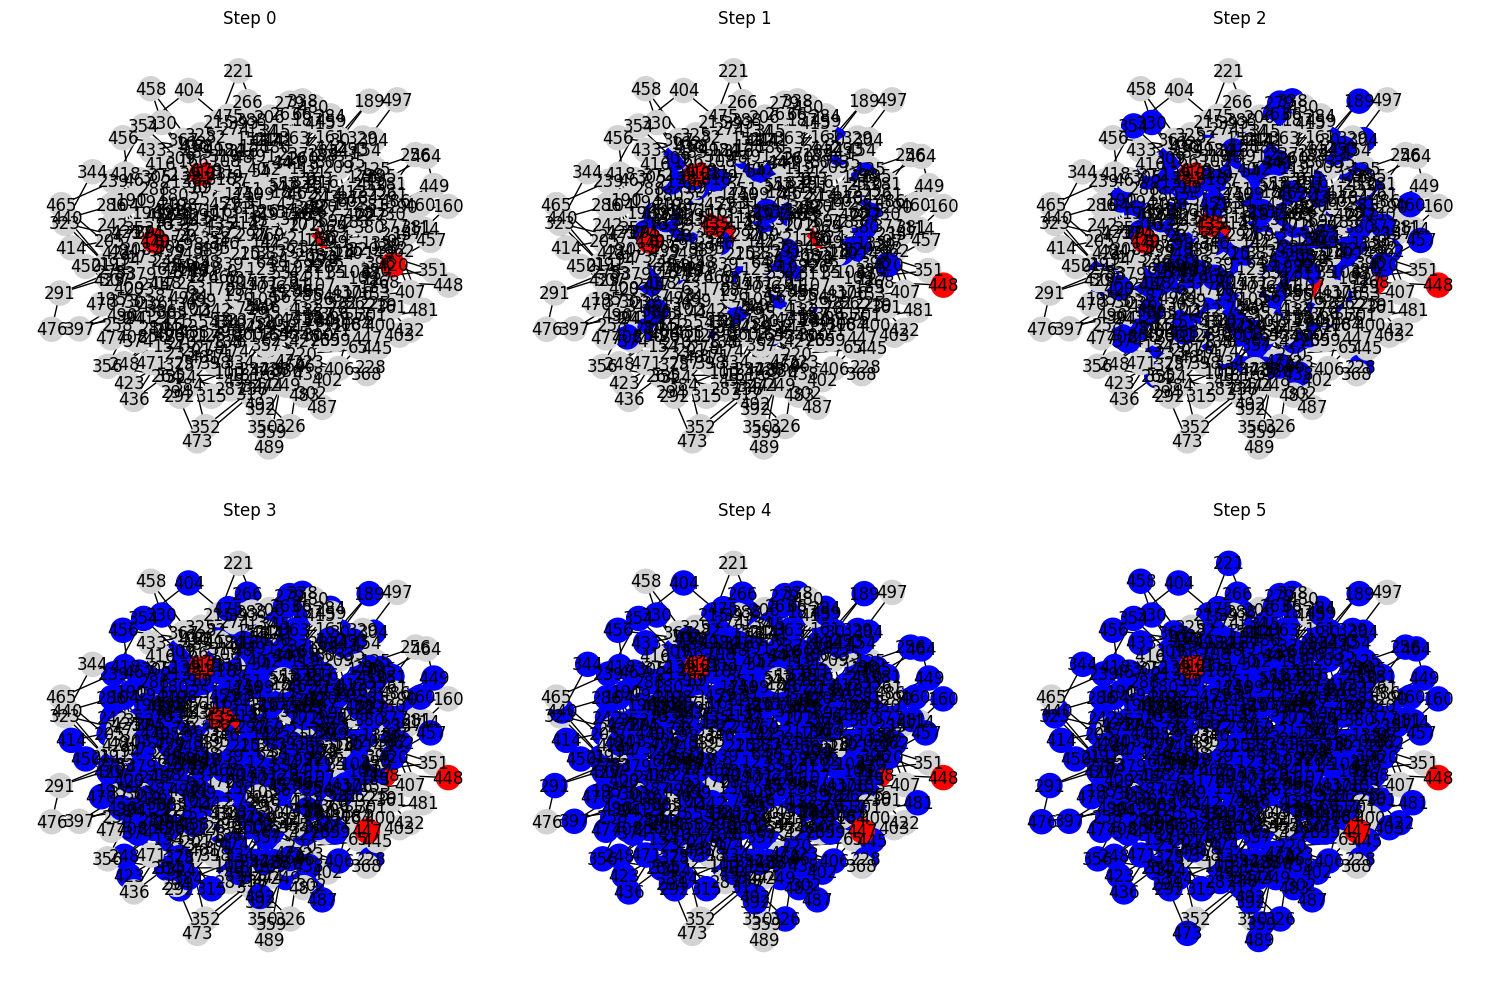

count deinfuence 465


In [38]:
deinf_steps = 5
deinf_num = 5

model = full_model.InfluenceDeinfluenceModel(model_inf.graph)
model.history = []
print("Optimized Influencers:", optimized_influencers)
model.set_initial_states()
model.set_influencers(optimized_influencers)
deinfluencers = model.select_deinfluencers_betweenness_centrality(deinf_num)
model.set_deinfluencers(deinfluencers)
model.run_cascade(deinf_steps)
model.display_graphs_grid()

print("count deinfuence",model.count_deinfluenced())

Degree Centrality Ranking: [0, 7, 1]
Closeness Centrality Ranking: [0, 1, 2]
Betweenness Centrality Ranking: [0, 1, 7]
Eigenvector Centrality Ranking: [0, 1, 7]
PageRank Centrality Ranking: [0, 7, 1]
Random Deinfluencers: [35, 256, 167]
Degree: 331.60 nodes deinfluenced on average
Closeness: 321.20 nodes deinfluenced on average
Betweenness: 327.20 nodes deinfluenced on average
Eigenvector: 316.50 nodes deinfluenced on average
PageRank: 332.30 nodes deinfluenced on average
random: 140.60 nodes deinfluenced on average


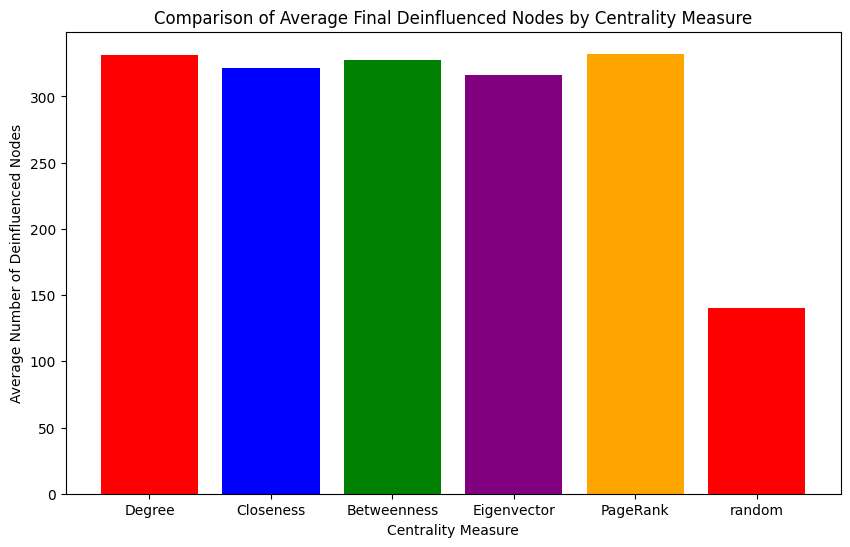

In [40]:
# Function to run the cascade and count deinfluenced nodes
def count_deinfluenced(model, inf, deinf, num_runs, steps):
    total_deinfluenced = 0
    for run in range(num_runs):
        model.reset_graph()
        model.set_influencers(inf)
        model.set_deinfluencers(deinf)
        model.run_cascade(steps)
        #print(model.history)
        deinfluenced_count = model.count_deinfluenced()
        #print(deinfluenced_count)
        #print(f"Run {run+1}/{num_runs}: {deinfluenced_count} nodes deinfluenced")
        total_deinfluenced += deinfluenced_count
        #print(f"Total deinfluenced nodes: {total_deinfluenced}")
        model.reset_graph()
        
    average_deinfluenced = total_deinfluenced / num_runs
    #print(f"Average deinfluenced nodes: {average_deinfluenced}")

    return average_deinfluenced

# Initialize the model
model.reset_graph()

# Rank nodes using different centrality measures
k_deinfluencers = 3

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers, max_iter=1000, tol=1e-06)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)
random_deinfluencers = model.select_deinfluencers_random(k_deinfluencers)


print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)
print("Random Deinfluencers:", random_deinfluencers)


# Run cascades and count deinfluenced nodes for each centrality measure
num_runs = 10  # Number of times to run the cascade for averaging
steps = 3  # Number of steps to run the cascade

results = {
    'Degree': count_deinfluenced(model, optimized_influencers, degree_centrality_ranking, num_runs, steps),
    'Closeness': count_deinfluenced(model, optimized_influencers, closeness_centrality_ranking, num_runs, steps),
    'Betweenness': count_deinfluenced(model, optimized_influencers, betweenness_centrality_ranking, num_runs, steps),
    'Eigenvector': count_deinfluenced(model, optimized_influencers, eigenvector_centrality_ranking, num_runs, steps),
    'PageRank': count_deinfluenced(model, optimized_influencers, pagerank_centrality_ranking, num_runs, steps),
    'random': count_deinfluenced(model, optimized_influencers, random_deinfluencers, num_runs, steps)
}

# Print the results
for centrality, count in results.items():
    print(f"{centrality}: {count:.2f} nodes deinfluenced on average")

# Plot the results
plt.figure(figsize=(10, 6))  # Increase the figure size
plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Centrality Measure')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Comparison of Average Final Deinfluenced Nodes by Centrality Measure')
plt.show()


Aggregated Results: [320.8, 324.4, 319.5, 330.9, 315.8, 327.9, 322.9, 323.6, 326.1, 333.5]


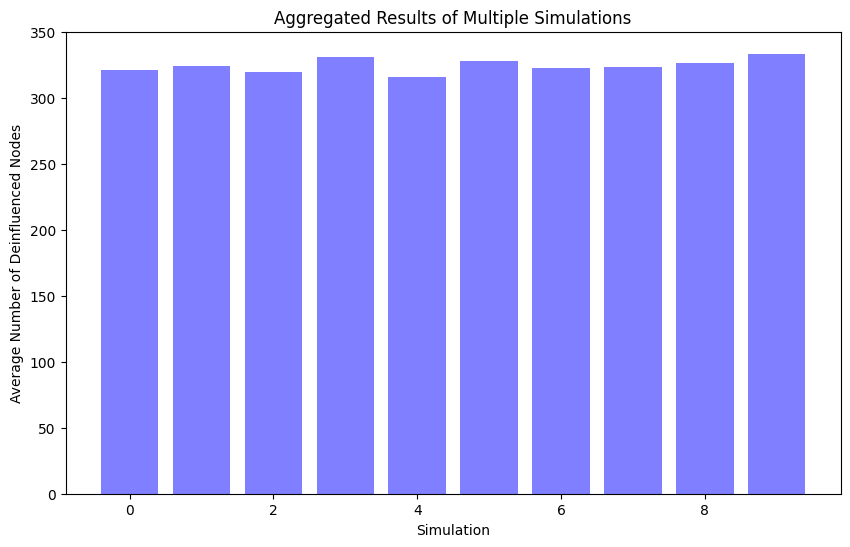

In [41]:

# Initialize an empty dictionary to store the aggregated results
aggregated_results = []

# Run the simulation k times
for i in range(10):
    # Reset the graph and set the influencers
    model.reset_graph()
    model.set_influencers(optimized_influencers)
    
    # Run the cascade and count deinfluenced nodes
    result = count_deinfluenced(model, optimized_influencers, degree_centrality_ranking, num_runs, steps)
    
    # Store the result in the aggregated_results dictionary
    aggregated_results.append(result)

print("Aggregated Results:", aggregated_results)

# Plot the aggregated results

plt.figure(figsize=(10, 6))  # Increase the figure size
for i, result in enumerate(aggregated_results):
    plt.bar(i, result, color='blue', alpha=0.5)
plt.xlabel('Simulation')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Aggregated Results of Multiple Simulations')
plt.show()